### Complex Networks
### HW2 Due April 26th
#### Sarah Elghazoly

### Assignment:

1. Download real network from sources from HW1
2. Perform following network analysis: 
---> Calculate probability degree distribution p(k), average path length of the network l, calculate average clustering coefficient and the distribution of the clustering coefficient

---> Rewire the network with probability \beta following watts strogatz model, and recalculate p(k), <L>,<C>, and C(k)

---> Calculate centrality matrix: degree, betweenness

---> Investigate the effect of removing high degree nodes and high betweenness centrality nodes of the GCC of the network

---> Perform a community detection using the modularity algorithm and compute the value of Q of the network. Report a plot of the network colored by modules.
    
---> Report the cluster adjacency matrix according to the modules.
    
---> Calculate k_nn vs degree k: is the network assortative or dissasortative?
    
---> Display network visualization using gephi
    
---> jupyter notebook must explain the flow.

In [263]:
#First thing to do: import the libraries§
import matplotlib.pyplot as plt
import numpy as np
import powerlaw
import networkx as nx
import time
import pandas as pd

import heapq


In [264]:
from IPython.display import Image


##### Description of the Data

This data set is a network protein interactions in yeast, where a node represents a protein and an edge represents a metabolic interaction between two proteins.

In [265]:
# import the data set
path_file = "out_moreno_propro_propro.txt"
edge_list = pd.read_csv(path_file, delimiter = ' ', header = None, names=['source','target'])

# path_file = "roadNet-CA.txt"
# edge_list = pd.read_csv(path_file, delimiter = '\t', header = None, names=['source','target'])

In [266]:
# set the network using networkx
G = nx.read_edgelist(path_file)

##### 1. Calculate probability degree distribution p(k), average path length of the network l, calculate average clustering coefficient and the distribution of the clustering coefficient

In [267]:
degree_sequence_nx=[d for n,d in G.degree()]
bins=np.arange(0.5,max(np.unique(degree_sequence_nx)))
counts, bins=np.histogram(degree_sequence_nx,bins=bins)
x=(bins[1:]-bins[:-1])/2 +bins[:-1]

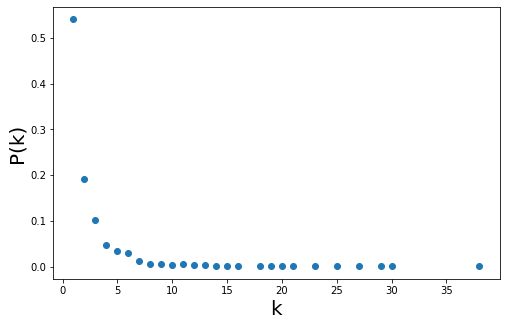

In [268]:
plt.figure(figsize=(8,5))
plt.plot(x[counts!=0],counts[counts!=0]/sum(counts[counts!=0]),'o')
plt.ylabel('P(k)', fontsize=20)
plt.xlabel('k',fontsize=20)

plt.show()

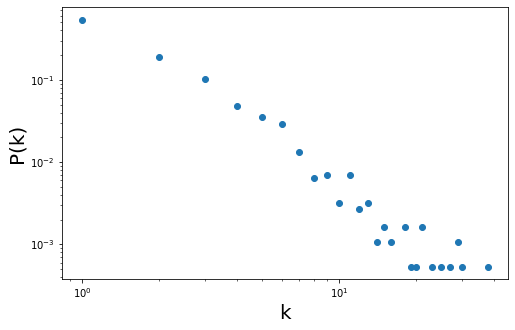

In [269]:
plt.figure(figsize=(8,5))
plt.loglog(x[counts!=0],counts[counts!=0]/sum(counts[counts!=0]),'o')
plt.ylabel('P(k)', fontsize=20)
plt.xlabel('k',fontsize=20)

plt.show()

In [270]:
# power law fit
fit = powerlaw.Fit(degree_sequence_nx, discrete=True)
alpha=fit.alpha
print('scaling expoenent',alpha)
k_min=fit.xmin
print('k_min',k_min)

scaling expoenent 2.9791043034214173
k_min 5.0


Calculating best minimal value for power law fit
C:\ProgramData\Anaconda3\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


In [271]:
# having an issue computing the path length for G, 
# seems like it has multiple subgraphs of connected components
# Here I compute avg shortest path length for the indiv connected components.

# A = (G.subgraph(c) for c in nx.connected_components(G))

# for C in A:
#     print('Number of nodes', len(nx.nodes(C)))
#     print(nx.average_shortest_path_length(C))

# Just going to take the average path length for the largest connected network in G

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)

G0 = G.subgraph(Gcc[0])

# Visualize subgraph
# pos = nx.spring_layout(G)
# nx.draw(G0, pos, node_size=280, with_labels=True, width= 0.9)

print('Average path length: ', nx.average_shortest_path_length(G0))



Average path length:  6.812366015065626


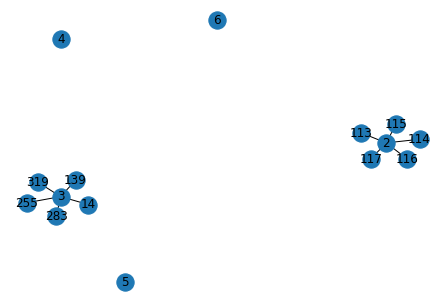

In [272]:
# visualize subgraph

nodes = edge_list['target'].unique()[:15]

H = G0.subgraph([str(i) for i in nodes])

nx.draw(H,with_labels=True)

In [273]:
# Average clustering coefficient

print('Average clustering coefficient: ', nx.average_clustering(G0))


Average clustering coefficient:  0.07083049680177278


In [274]:
# Distribution of the clustering coefficient

nodes_clustering_coefficient=nx.clustering(G0)


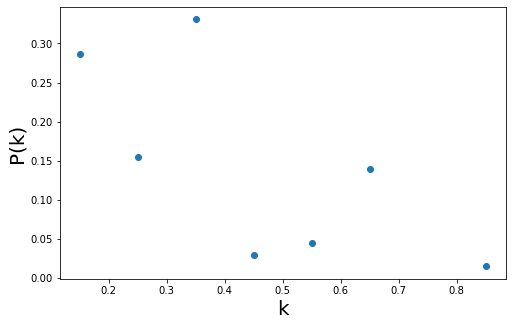

In [275]:
c_vals = list(nodes_clustering_coefficient.values())

bins2 = np.arange(0.1, max(np.unique(list(nodes_clustering_coefficient.values()))), 0.1)
counts2, bins2 = np.histogram(c_vals,bins = bins2)

x=(bins2[1:]-bins2[:-1])/2 +bins2[:-1]

plt.figure(figsize=(8,5))
plt.plot(x[counts2!=0],counts2[counts2!=0]/sum(counts2[counts2!=0]),'o')
plt.ylabel('P(k)', fontsize=20)
plt.xlabel('k',fontsize=20)

plt.show()

##### 2. Rewire the network with probability $\beta$ following watts strogatz model, and recalculate p(k), ,, and C(k)

In [280]:
k=5
N=1458
C,L=[],[]
beta_values=np.logspace(np.log10(0.0001),np.log10(1.0), 14)
for beta in beta_values:
    c,l=[],[]
    for _ in np.arange(10):#<-- average over diferent realizations!!!
        c.append(nx.average_clustering(nx.watts_strogatz_graph(N,k,beta)))
        l.append(nx.average_shortest_path_length(nx.watts_strogatz_graph(N,k,beta)))
    C.append(np.mean(c))
    L.append(np.mean(l))

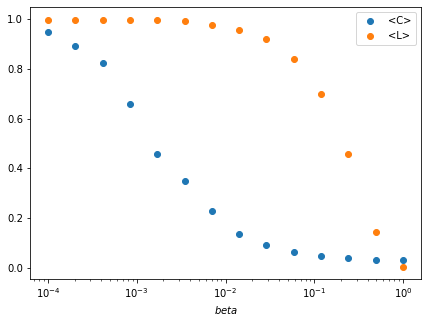

In [281]:
plt.figure(figsize=(7,5))
c0=nx.average_clustering(nx.watts_strogatz_graph(N,k,0))
l0=nx.average_shortest_path_length(nx.watts_strogatz_graph(N,k,0))
plt.plot( beta_values,np.divide(L,l0),'o',label='<C>')
plt.plot( beta_values,np.divide(C,c0),'o',label='<L>')
plt.xscale('log')

plt.xlabel('$beta$',fontsize=10)

plt.legend()

plt.show()

#### 3. Calculate centrality metrics: degree, betweenness

In [282]:
degree_cent = nx.degree_centrality(G0)
G_bet = nx.betweenness_centrality(G0, normalized=True)

In [283]:
G_bet

{'1': 0.03541743905202168,
 '2': 0.01588466675354411,
 '3': 0.07847248516101063,
 '4': 0.005969162192032535,
 '5': 0.026119822616564727,
 '6': 0.0008832052528337724,
 '113': 0.005598652243100223,
 '114': 0.012100140261262498,
 '115': 0.0066955755262964895,
 '116': 0.0,
 '117': 0.0,
 '14': 0.0,
 '139': 0.009836776527427865,
 '255': 0.005882561308188616,
 '283': 0.0,
 '319': 0.01097060079395009,
 '487': 0.00183328525169637,
 '530': 0.002743096514144017,
 '642': 0.005484134945356634,
 '816': 0.008153898009462103,
 '823': 0.0,
 '1031': 0.01891094113811301,
 '1082': 0.008924147766125861,
 '1374': 0.015672392900280153,
 '1406': 0.024705190899214163,
 '1425': 0.0,
 '1435': 0.011719214532776015,
 '1436': 0.0,
 '1437': 0.01975352572668257,
 '1438': 0.0,
 '1448': 0.006402773976251957,
 '664': 0.012413743740029947,
 '801': 0.004114279680511664,
 '1134': 0.009682492707977846,
 '1591': 0.0009899418006432945,
 '1337': 0.0007757225101659286,
 '7': 0.0028432471080852605,
 '8': 0.0009191685629553969,
 

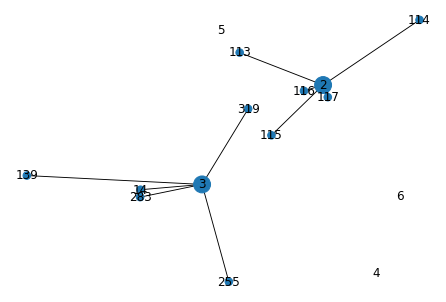

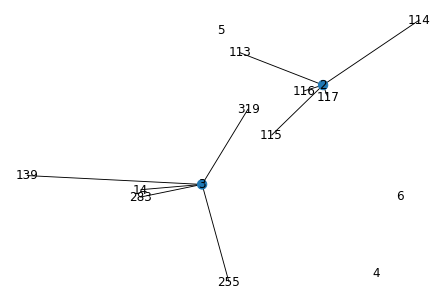

In [284]:
# Visualize centrality:
degree_cent_H = nx.degree_centrality(H)
nx.draw(H, pos, node_size=[degree_cent_H[key] * 800 for key in degree_cent_H.keys()], edge_color='k',
        with_labels=True, width= 0.9)

plt.show()

# Visualize betweenness:

H_bet = nx.betweenness_centrality(H, normalized = True)
nx.draw(H, pos, node_size=[H_bet[key] * 800 for key in H_bet.keys()], edge_color='k',
        with_labels=True, width= 0.9)

#### 4.  Investigate the effect of removing high degree nodes and high betweenness centrality nodes of the GCC of the network

In [285]:
Gcc = sorted(nx.connected_components(G0), key=len, reverse=True)
for i in Gcc:
    print(len(i))

1458


In [286]:
 
# remove highest 10 degree nodes and get GCC of the network

tempgraph1 = G0.copy()

# tempgraph1.remove_node(max(degree_cent, key=degree_cent.get))

for i in heapq.nlargest(10, degree_cent, key=degree_cent.get):
    tempgraph1.remove_node(i)
    
    
Gcc1 = sorted(nx.connected_components(tempgraph1), key=len, reverse=True)
for i in Gcc1:
    print(len(i))



1248
9
7
7
6
5
5
5
4
4
3
3
3
3
3
3
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [287]:
# remove highest 10 centrality nodes and visualize network

tempgraph2 = G0.copy()

for i in heapq.nlargest(10, G_bet, key=G_bet.get):
    tempgraph2.remove_node(i)

Gcc2 = sorted(nx.connected_components(tempgraph2), key=len, reverse=True)
for i in Gcc2:
    print(len(i))




1267
9
7
6
5
5
5
4
4
3
3
3
3
3
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


#### 5. Perform a community detection using the modularity algorithm and compute the value of Q of the network. Report a plot of the network colored by modules.

In [288]:
from networkx.algorithms.community import greedy_modularity_communities

c = list(greedy_modularity_communities(G0))

In [289]:
import colorsys

def get_color(red_to_green):
    assert 0 <= red_to_green <= 1
    # in HSV, red is 0 deg and green is 120 deg (out of 360);
    # divide red_to_green with 3 to map [0, 1] to [0, 1./3.]
    hue = red_to_green / 3.0
    r, g, b = colorsys.hsv_to_rgb(hue, 1, 1)
    return map(lambda x: int(255 * x), (r, g, b))

In [302]:
import matplotlib.colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

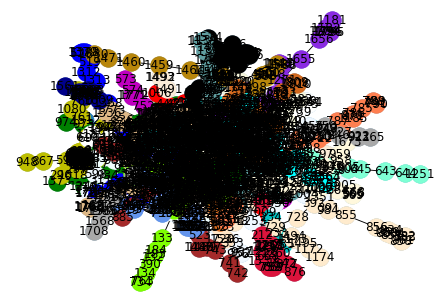

In [304]:
pos = nx.spring_layout(G0)

nx.draw(G0, pos, edge_color='k',  with_labels=True, node_size= 280, width= 0.9)

for i in np.arange(1, 35):
    nx.draw_networkx_nodes(G0, pos, nodelist=c[i], node_color= list(colors.keys())[i])
    
plt.show()

In [308]:
# compute Q

import networkx.algorithms.community as nx_comm

print("Q: ",nx_comm.modularity(G0, nx_comm.label_propagation_communities(G0)))

Q:  0.6178823574432231


#### 6.  Report the cluster adjacency matrix according to the modules.

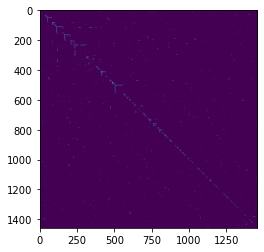

In [306]:
plt.imshow(nx.to_numpy_array(G0))
plt.show()

#### 7.  Calculate k_nn vs degree k: is the network assortative or dissasortative?

In [309]:
avg_degree = nx.average_neighbor_degree(G0)
degree = G0.degree

x = []
y = []
for key in avg_degree.keys():
    x.append(degree[key])
    y.append(avg_degree[key])

In [310]:
avg_y=[]
y=np.array(y)
for i in np.unique(x):
     avg_y.append(np.mean(y[x==i]))

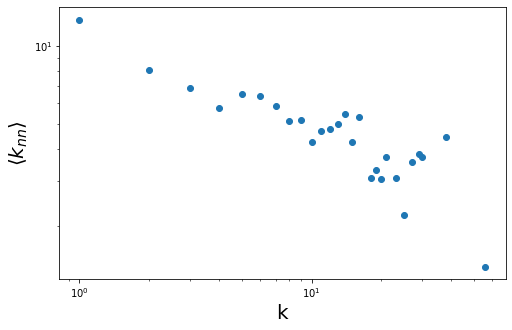

In [311]:
plt.figure(figsize=(8,5))

plt.plot(np.unique(x), avg_y, marker="o", ls="None")
plt.xlabel("k",fontsize=20)
plt.ylabel(r"$\langle k_{nn} \rangle$",fontsize=20)
plt.yscale('log')
plt.xscale('log')
plt.show()

Is the network assortative or disassortative? From the appearance of the $k_nn$ plot above it would appear that the network is disassortative.

#### 8. Display network visualization using gephi

In [313]:
# nx.write_gml(G0, 'G0.gml')

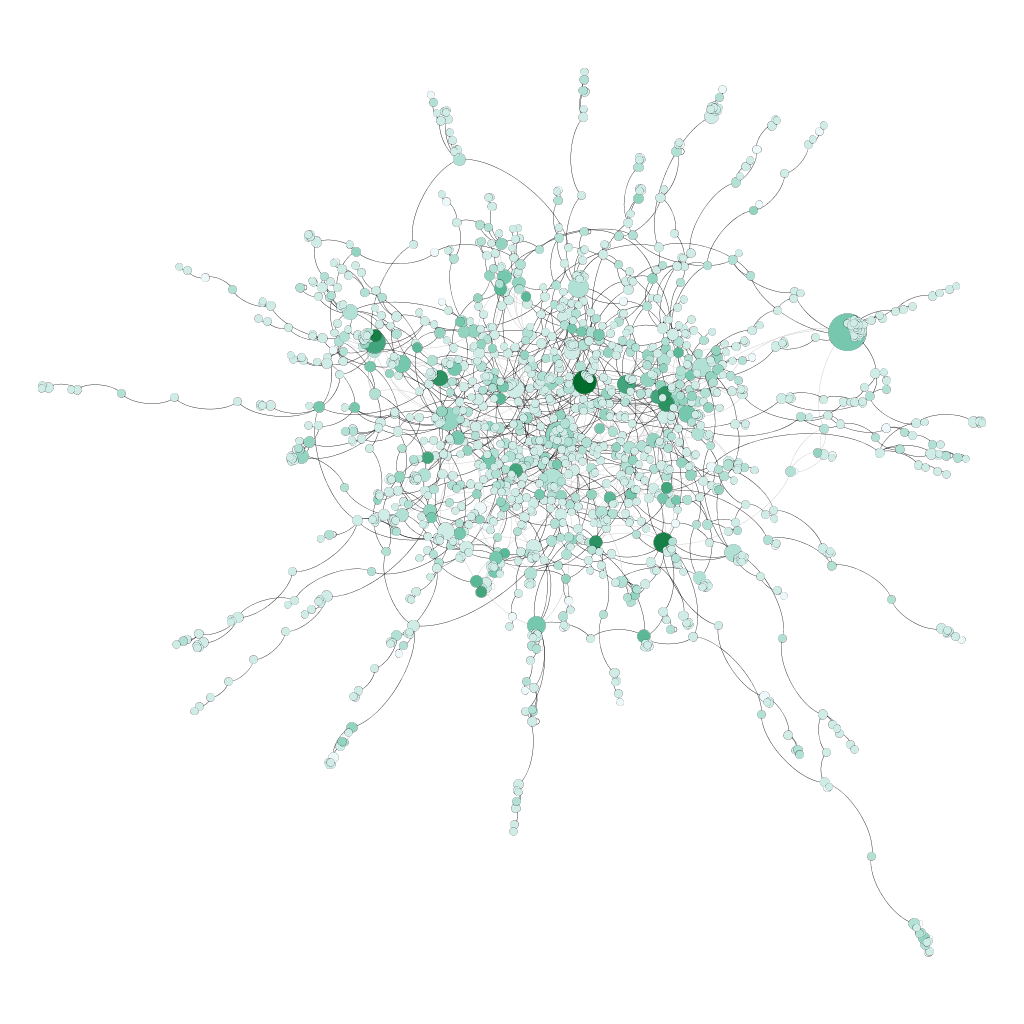

In [314]:
from IPython.display import Image
Image("G0_gephi_plot.png")